# Data analysis - Credit card data

In [228]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
#moj deo
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  train_test_split
from sklearn.metrics import confusion_matrix
import itertools
#
import pylab as pl

from sklearn.decomposition import PCA



from sklearn.model_selection import  train_test_split
from sklearn.metrics import confusion_matrix
import itertools

import pylab as pl

from sklearn.decomposition import PCA


from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans, DBSCAN


from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline 

import csv
from pathlib import Path
from itertools import product
import string
from pprint import pprint as pp
import datetime

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

#Podesavanja za matplotlib
%matplotlib inline

plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)



In [230]:
#Ucitavanje dataseta
from subprocess import check_output
df = pd.read_csv("C:/Users/kolac/Desktop/MFS/creditcard.csv")
pd.options.display.max_columns= None
#Prikazuje prvih 5 parametara
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [232]:
#Prikaz dimenzija dataseta
print(df.shape)

(284807, 31)


In [234]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

# Descriptive statistics

In [236]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Data range

In [238]:
# raspon vrednosti od v1 do v28
pom = df.iloc[:,1:29]
pom

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533


In [240]:
minkolone = pom.min()
minkolone

V1     -56.407510
V2     -72.715728
V3     -48.325589
V4      -5.683171
V5    -113.743307
V6     -26.160506
V7     -43.557242
V8     -73.216718
V9     -13.434066
V10    -24.588262
V11     -4.797473
V12    -18.683715
V13     -5.791881
V14    -19.214325
V15     -4.498945
V16    -14.129855
V17    -25.162799
V18     -9.498746
V19     -7.213527
V20    -54.497720
V21    -34.830382
V22    -10.933144
V23    -44.807735
V24     -2.836627
V25    -10.295397
V26     -2.604551
V27    -22.565679
V28    -15.430084
dtype: float64

In [242]:
maxkolone = pom.max()
maxkolone

V1       2.454930
V2      22.057729
V3       9.382558
V4      16.875344
V5      34.801666
V6      73.301626
V7     120.589494
V8      20.007208
V9      15.594995
V10     23.745136
V11     12.018913
V12      7.848392
V13      7.126883
V14     10.526766
V15      8.877742
V16     17.315112
V17      9.253526
V18      5.041069
V19      5.591971
V20     39.420904
V21     27.202839
V22     10.503090
V23     22.528412
V24      4.584549
V25      7.519589
V26      3.517346
V27     31.612198
V28     33.847808
dtype: float64

In [244]:
maxkolone.max()

120.589493945238

In [246]:
minkolone.min()

-113.74330671114599

In [248]:
#ovo je odgovor raspona po kolonama
rasponkolona = maxkolone - minkolone
rasponkolona

V1      58.862440
V2      94.773457
V3      57.708148
V4      22.558515
V5     148.544973
V6      99.462131
V7     164.146736
V8      93.223927
V9      29.029061
V10     48.333399
V11     16.816387
V12     26.532107
V13     12.918764
V14     29.741092
V15     13.376686
V16     31.444966
V17     34.416326
V18     14.539815
V19     12.805499
V20     93.918625
V21     62.033221
V22     21.436234
V23     67.336147
V24      7.421176
V25     17.814986
V26      6.121896
V27     54.177877
V28     49.277892
dtype: float64

# Missing values

In [250]:
#Komanda koja nam kaze da li postoje neke missing values u nasem datasetu
print(df.isnull().values.any())

False


In [252]:
#Kolicina missing values po koloni
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# Imbalance class

In [254]:
#Prikazuje distinktne vrednosti u datasetu za "Class"
print(df.Class.value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [256]:
#Prikazuje procenat koliko vrednosti iz kolone "Class" je == 1
(len(df.loc[df.Class==1])) / (len(df.loc[df.Class == 0])) * 100

0.17304750013189596

This dataset is highly imbalanced, there are only 0.17% (492) fraudulent transactions and 99.83% (284315) valid transactions.

# Distinct values for 'Amount' and 'Time' columns

In [258]:
#Prikazuje koliko distinct vrednosti imamo i koje su za "Amount"
print(df.Amount.value_counts())

1.00       13688
1.98        6044
0.89        4872
9.99        4747
15.00       3280
           ...  
192.63         1
218.84         1
195.52         1
793.50         1
1080.06        1
Name: Amount, Length: 32767, dtype: int64


In [260]:
#Prikazuje koliko redova ima vrednost 0 za kolonu amount
print(df.Amount.value_counts()[0])

# printuje procenat koliko vrednosti je == 1
(len(df.loc[df.Amount==0])) / (len(df.loc[df.Amount!=0])) * 100

1825


0.6449173445660854

In [261]:
#Prikazuje koliko redova ima vrednost 1 za kolonu amount
print(df.Amount.value_counts()[1])

# printuje procenat koliko vrednosti je == 1
(len(df.loc[df.Amount==1])) / (len(df.loc[df.Amount!=1])) * 100

13688


5.048705549961456

In [262]:
#Prikazuje koliko distinct vrednosti imamo i koje su za "Time"
print(df.Time.value_counts())


163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
2088.0       1
64100.0      1
42068.0      1
119630.0     1
140344.0     1
Name: Time, Length: 124592, dtype: int64


# Detecting outliers

<AxesSubplot:ylabel='Amount'>

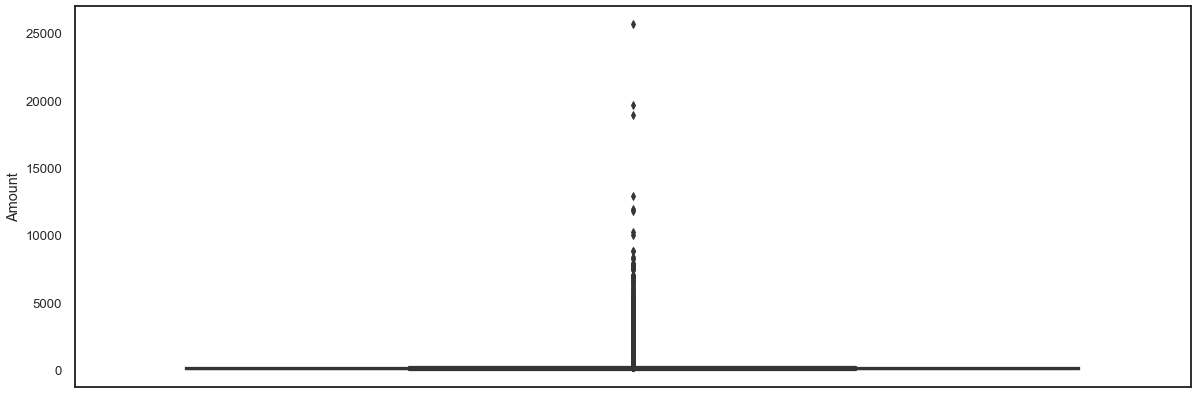

In [263]:
#Plotovanje outliera za kolonu Amount
sns.boxplot(y=df['Amount'])

# Correlation matrix


In [264]:
#Korelaciona matrica
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,7.433820e-17,2.438580e-16,2.422086e-16,-2.115458e-16,9.352582e-16,-3.252451e-16,6.308789e-16,-5.011524e-16,2.870125e-16,1.818128e-16,1.036959e-16,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,-4.782388e-16,9.468995e-16,-6.588252e-16,3.854521e-16,-2.541036e-16,2.831060e-16,4.934097e-17,-9.883008e-16,2.636654e-16,9.528280e-17,-9.309954e-16,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,6.289267e-16,-5.501758e-17,2.206522e-16,-6.883375e-16,4.271336e-16,1.122756e-16,1.183364e-15,4.576619e-17,5.427965e-16,2.576773e-16,-9.429297e-16,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,6.055490e-16,-2.083600e-16,-5.657963e-16,-1.506129e-16,-8.522435e-17,-1.507718e-16,-6.939204e-16,-4.397925e-16,1.493667e-16,-2.656938e-16,-3.223123e-16,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,-6.601716e-16,7.342759e-16,3.761033e-16,-9.578659e-16,-3.634803e-16,-5.132620e-16,-3.517076e-16,1.425729e-16,1.109525e-15,-3.138234e-16,2.076048e-16,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,2.850776e-16,4.865799e-16,2.140589e-16,-2.268061e-16,3.452801e-16,-6.368111e-18,-2.477917e-16,3.567582e-16,2.811474e-16,2.717167e-16,1.898638e-16,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,3.043333e-17,-1.084105e-15,1.510045e-15,-9.892325e-17,-1.729462e-16,1.936832e-17,2.893672e-16,1.149692e-15,-1.116789e-16,-2.874017e-16,1.744242e-16,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,9.051847e-17,1.954747e-16,-6.266057e-17,-2.382948e-16,-1.131098e-16,2.021491e-16,5.027192e-16,-3.508777e-16,-4.093852e-16,-5.339821e-16,-1.095534e-16,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,-2.771761e-16,4.682341e-16,-2.445230e-15,-2.650351e-16,2.343317e-

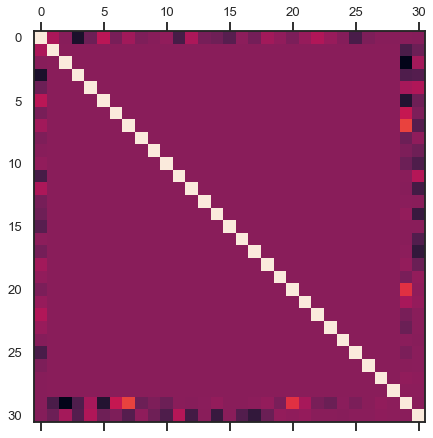

In [265]:
plt.matshow(df.corr())
plt.show()

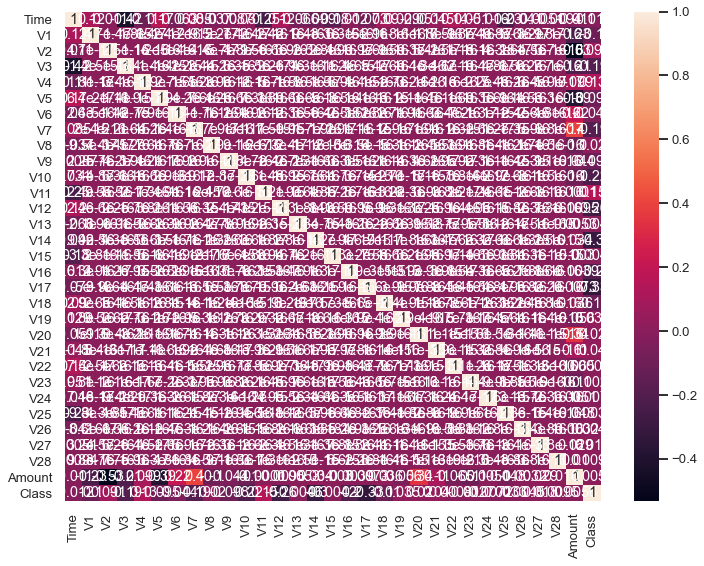

In [266]:
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
heatmapa = sns.heatmap(corrmat, annot=True)
plt.show()

In [267]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117396,-0.010593,-0.419618,-0.105260,0.173072,-0.063016,0.084714,-0.036949,-0.008660,0.030617,-0.247689,0.124348,-0.065902,-0.098757,-0.183453,0.011903,-0.073297,0.090438,0.028975,-0.050866,0.044736,0.144059,0.051142,-0.016182,-0.233083,-0.041407,-0.005135,-0.009413,-0.010596,-0.012323
V1,0.117396,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.227709,-0.101347
V2,-0.010593,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.531409,0.091289
V3,-0.419618,-0.000000,0.000000,1.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.210880,-0.192961
V4,-0.105260,0.000000,-0.000000,-0.000000,1.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.098732,0.133447
V5,0.173072,0.000000,-0.000000,-0.000000,-0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.386356,-0.094974
V6,-0.063016,0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.215981,-0.043643
V7,0.084714,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.397311,-0.187257
V8,-0.036949,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.103079,0.019875
V9,-0.008660,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.044246,-0.097733


# Data visualisation

## Visualising transactions per time of day

In [268]:
def convert_time(sec):
    return datetime.datetime.fromtimestamp(sec)

cc_fraud_time = df[['Time','Amount','Class']].copy()
cc_fraud_time['time'] = cc_fraud_time.Time.apply(convert_time)
timeDelta = datetime.datetime.utcnow() - datetime.datetime.now() 
cc_fraud_time['hour'] = cc_fraud_time.time + timeDelta
cc_fraud_time['hour'] = cc_fraud_time.hour.dt.hour
cc_fraud_time_grouped = cc_fraud_time.groupby(['hour','Class'])

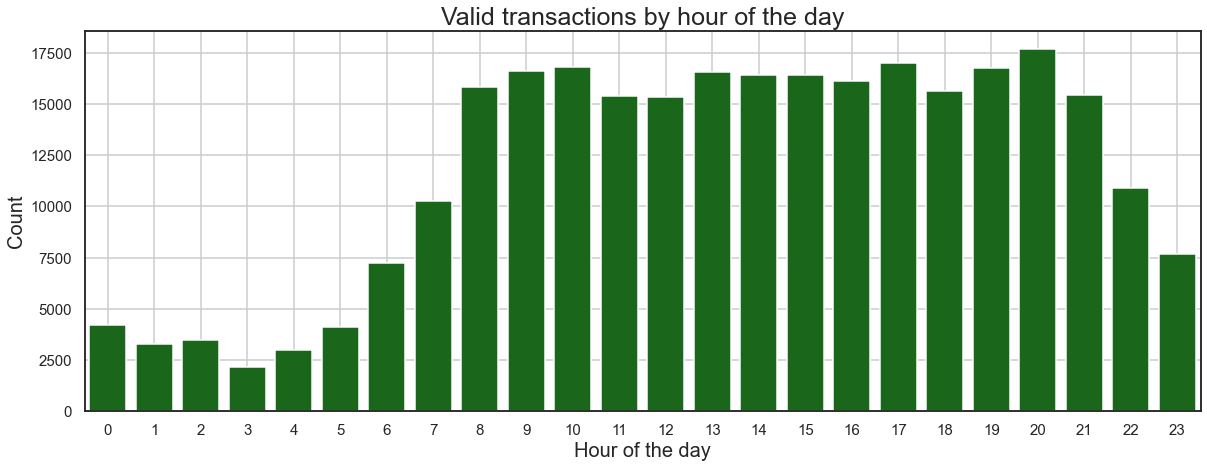

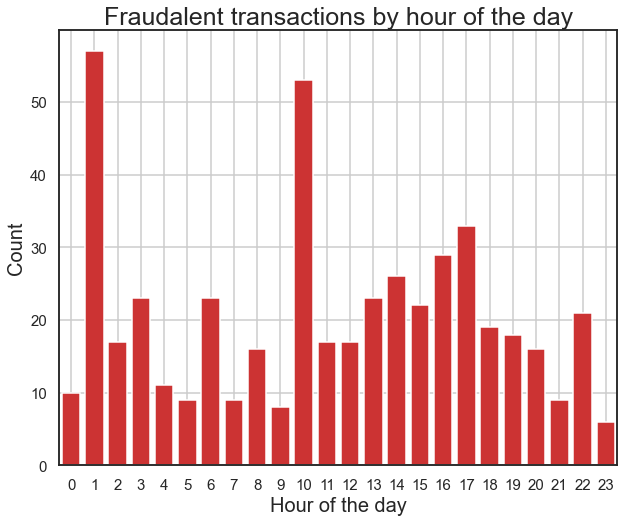

In [269]:
plt.figure()
sns.set_context({"figure.figsize": (10, 8)})
g = sns.countplot(data = cc_fraud_time[cc_fraud_time.Class == 0], x = 'hour', color = 'green',
                 saturation = 0.6)
plt.title("Valid transactions by hour of the day", fontsize=25)
plt.xlabel('Hour of the day', fontsize=20);plt.xticks(fontsize=15)
plt.ylabel('Count', fontsize=20);plt.yticks(fontsize=15)
g.axes.grid('off')

plt.figure()
sns.set_context({"figure.figsize": (10, 8)})
g = sns.countplot(data = cc_fraud_time[cc_fraud_time.Class == 1], x = 'hour', color = 'red', saturation = 0.6)
plt.title("Fraudalent transactions by hour of the day", fontsize=25)
plt.xlabel('Hour of the day',fontsize=20);plt.xticks(fontsize=15)
plt.ylabel('Count', fontsize=20);plt.yticks(fontsize=15)
plt.ylabel('Count')
g.axes.grid('off')

## Visualising transactions by amount

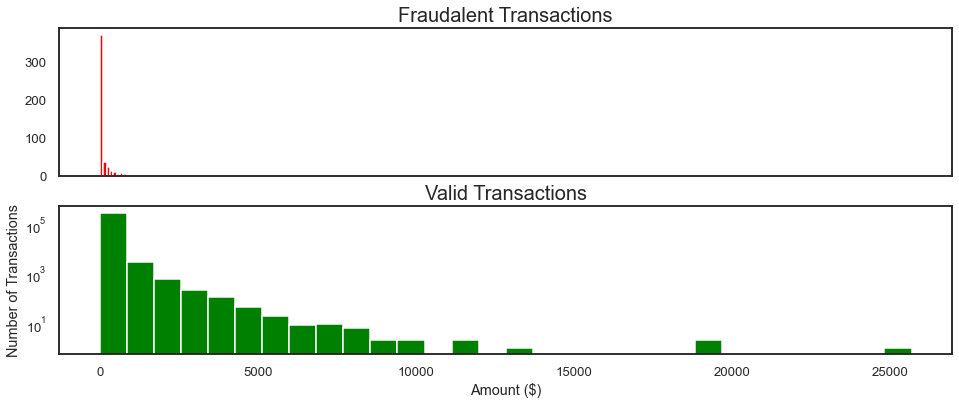

In [270]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,6))


ax1.hist(df.Amount[df.Class == 1], bins = 20, color='red')
ax1.set_title('Fraudalent Transactions', fontsize=20)

ax2.hist(df.Amount[df.Class == 0], bins = 30, color='green')
ax2.set_title('Valid Transactions', fontsize=20)

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
        1.e+06]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

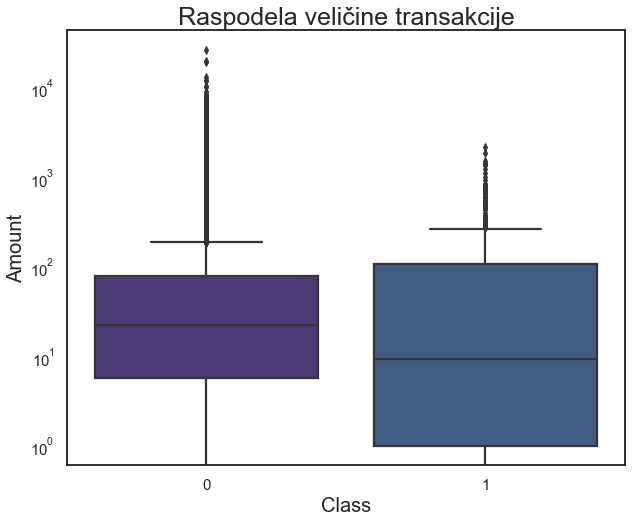

In [271]:
plt.figure()
plt.yscale('log')
sns.set_context({"figure.figsize": (10, 8)})
g = sns.boxplot(data = df, x = 'Class', y = 'Amount')
plt.title("Raspodela veličine transakcije", fontsize=25)
plt.xlabel('Class', fontsize=20); plt.xticks(fontsize=15)
plt.ylabel('Amount', fontsize=20); plt.yticks(fontsize=15)

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

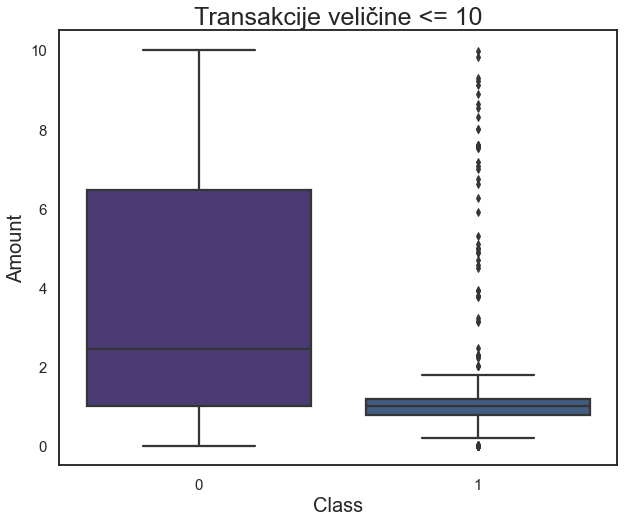

In [272]:
plt.figure()
sns.set_context({"figure.figsize": (10, 8)})
g = sns.boxplot(data=df.loc[df.Amount <= 10,:], x = 'Class', y = 'Amount')
plt.title("Transakcije veličine <= 10", fontsize=25)
plt.xlabel('Class', fontsize=20); plt.xticks(fontsize=15)
plt.ylabel('Amount', fontsize=20); plt.yticks(fontsize=15)

# Data normalisation

In [273]:
#Z score prema funkciji

z = stats.zscore(df)

print(z)


[[-1.99658302 -0.69424232 -0.04407492 ... -0.06378115  0.24496426
  -0.04159898]
 [-1.99658302  0.60849633  0.16117592 ...  0.04460752 -0.34247454
  -0.04159898]
 [-1.99656197 -0.69350046 -0.81157783 ... -0.18102083  1.16068593
  -0.04159898]
 ...
 [ 1.6419735   0.98002374 -0.18243372 ... -0.0804672  -0.0818393
  -0.04159898]
 [ 1.6419735  -0.12275539  0.32125034 ...  0.31668678 -0.31324853
  -0.04159898]
 [ 1.64205773 -0.27233093 -0.11489898 ...  0.04134999  0.51435531
  -0.04159898]]


In [274]:
# min max normalizacija
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
print(scaler.fit(df))
MinMaxScaler()
print(scaler.data_max_)
print(scaler.transform(df))


 


MinMaxScaler()
[1.72792000e+05 2.45492999e+00 2.20577290e+01 9.38255843e+00
 1.68753440e+01 3.48016659e+01 7.33016255e+01 1.20589494e+02
 2.00072084e+01 1.55949946e+01 2.37451361e+01 1.20189132e+01
 7.84839208e+00 7.12688296e+00 1.05267661e+01 8.87774160e+00
 1.73151115e+01 9.25352625e+00 5.04106919e+00 5.59197143e+00
 3.94209042e+01 2.72028392e+01 1.05030901e+01 2.25284117e+01
 4.58454914e+00 7.51958868e+00 3.51734561e+00 3.16121981e+01
 3.38478078e+01 2.56911600e+04 1.00000000e+00]
[[0.00000000e+00 9.35192337e-01 7.66490419e-01 ... 3.12696634e-01
  5.82379309e-03 0.00000000e+00]
 [0.00000000e+00 9.78541955e-01 7.70066651e-01 ... 3.13422663e-01
  1.04705276e-04 0.00000000e+00]
 [5.78730497e-06 9.35217023e-01 7.53117667e-01 ... 3.11911316e-01
  1.47389219e-02 0.00000000e+00]
 ...
 [9.99976851e-01 9.90904812e-01 7.64079694e-01 ... 3.12584864e-01
  2.64215395e-03 0.00000000e+00]
 [9.99976851e-01 9.54208999e-01 7.72855742e-01 ... 3.15245157e-01
  3.89238944e-04 0.00000000e+00]
 [1.0000000

# Principal component analysis 


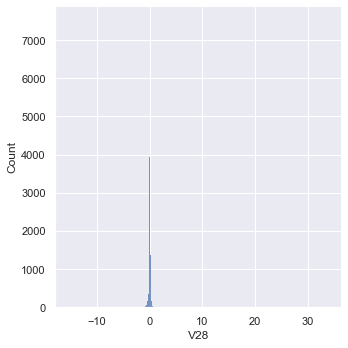

In [275]:
data_to_pca = df.drop(['Time', 'Class'], axis=1)
normalized_data = StandardScaler().fit_transform(data_to_pca)
sns.set()

sns.displot(df['V28'])

In [276]:
pca_model = PCA(n_components=2)
pca_creditcard = pca_model.fit_transform(normalized_data)
#print(pca_creditcard)
print('Explained variation per principal component: {}'.format(pca_model.explained_variance_ratio_))

Explained variation per principal component: [0.06751055 0.03448276]


# SMOTE for imbalanced data

In [277]:
###importujemo iz sklearn preprocessing




# Normalizacija data atributa


scaler = MinMaxScaler()

normalized_df = df.copy()

x = df.values
x_scaled = scaler.fit_transform(x)

df_temp = pd.DataFrame(x_scaled, columns=None, index = normalized_df.index)
normalized_df = df_temp

print(normalized_df.iloc[:,29].values)
#normalized_df1 = normalized_df.rename(columns = {'0': 'Time', '29': 'Amount', '30': 'Class'}, inplace = False)
normalized_df.columns =['Time', 'V1', 'V2', 'V3','V4', 'V5', 'V6', 'V7','V8','V9','V10','V11','V12', 'V13', 'V14', 'V15'
                        ,'V16', 'V17', 'V18', 'V19','V20','V21','V22','V23','V24',
                       'V25', 'V26', 'V27', 'V28','Amount', 'Class']


[0.00582379 0.00010471 0.01473892 ... 0.00264215 0.00038924 0.00844649]


In [278]:
normalized_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,0.252484,0.680908,0.371591,0.635591,0.446084,0.434392,0.737173,0.655066,0.594863,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,0.381188,0.744342,0.486190,0.641219,0.383840,0.464105,0.727794,0.640681,0.551930,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,0.322422,0.706683,0.503854,0.640473,0.511697,0.357443,0.763381,0.644945,0.386683,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,0.271817,0.710910,0.487635,0.636372,0.289124,0.415653,0.711253,0.788492,0.467058,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,0.236355,0.724477,0.552509,0.608406,0.349419,0.434995,0.724243,0.650665,0.626060,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,0.598850,0.190550,0.806406,0.394978,0.801627,0.267218,0.484577,0.789000,0.688412,0.509985,0.595979,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030,0.0
284803,0.999971,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,0.488530,0.276355,0.738709,0.542361,0.623352,0.423414,0.426717,0.730383,0.569303,0.442620,0.580900,0.564933,0.553153,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965,0.0
284804,0.999977,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,0.498692,0.309763,0.706572,0.434111,0.628885,0.435700,0.453827,0.740239,0.680504,0.518236,0.580280,0.565220,0.537005,0.664877,0.468492,0.592824,0.411177,0.416593,0.312585,0.002642,0.0
284805,0.999977,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,0.500464,0.170288,0.667901,0.367667,0.661171,0.483042,0.429998,0.745946,0.729908,0.789612,0.581622,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389,0.0


In [279]:
def prep_data(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    """
    Konvertujemo data frame u dve varijable
    X: kolone (Time - V28 i Amount)
    y: kolona Class
    """
    X = df.iloc[:, 0:30].values
    y = df.Class.values
    return X, y

In [280]:
# Definišemo funkciju da bismo kreirali scatter plot za naše podatke i labele
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 28], label="Valid", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 28], label="Fraud", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

In [281]:
def compare_plot(X: np.ndarray, y: np.ndarray, X_resampled: np.ndarray, y_resampled: np.ndarray, method1: str, method2: str):
    plt.subplot(1, 2, 1)
    plt.scatter(X[y == 0, 0], X[y == 0, 28], label="Valid", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 28], label="Fraud", alpha=0.5, linewidth=0.15, c='r')
    plt.title(method1)
    plt.subplot(1, 2, 2)
    plt.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 28], label="Valid", alpha=0.5, linewidth=0.15)
    plt.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 28], label="Fraud", alpha=0.5, linewidth=0.15, c='r')
    plt.title(method2)
    plt.legend()
    plt.show()

In [282]:
#Normalising 'Amount' column to compare SMOTE effectiveness
scaler = MinMaxScaler()
column_names_to_normalize = ['Amount']
amount_norm_df = df.copy()

x = amount_norm_df[column_names_to_normalize].values
x_scaled = scaler.fit_transform(x)

df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = amount_norm_df.index)
amount_norm_df[column_names_to_normalize] = df_temp

print(amount_norm_df.iloc[:,29].values)
print(df.Amount.values)

[0.00582379 0.00010471 0.01473892 ... 0.00264215 0.00038924 0.00844649]
[149.62   2.69 378.66 ...  67.88  10.   217.  ]


In [283]:
# Deklarišemo i inicijalizujemo prep_data funkciju
X, y = prep_data(df)

In [284]:
print(f'X shape: {X.shape}\ny shape: {y.shape}')

X shape: (284807, 30)
y shape: (284807,)


In [285]:
# Definišemo i odabiramo resampling metodu
method = SMOTE()

In [286]:
# Kreiramo resamplovani set
X_resampled, y_resampled = method.fit_resample(X, y)

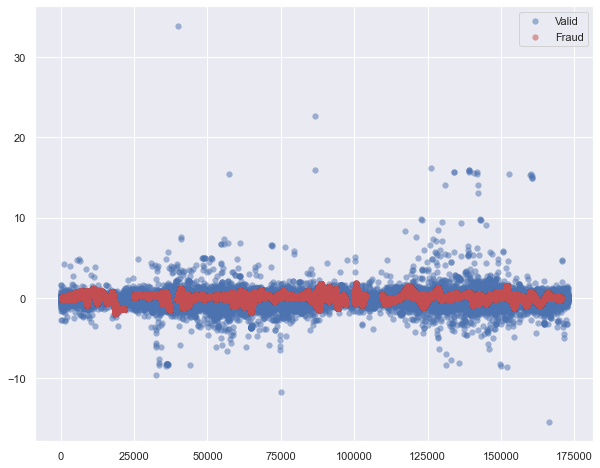

In [287]:
# Grafik za resamplovani data set
plot_data(X_resampled, y_resampled)

In [288]:
pd.value_counts(pd.Series(y))

0    284315
1       492
dtype: int64

In [289]:
pd.value_counts(pd.Series(y_resampled))

1    284315
0    284315
dtype: int64

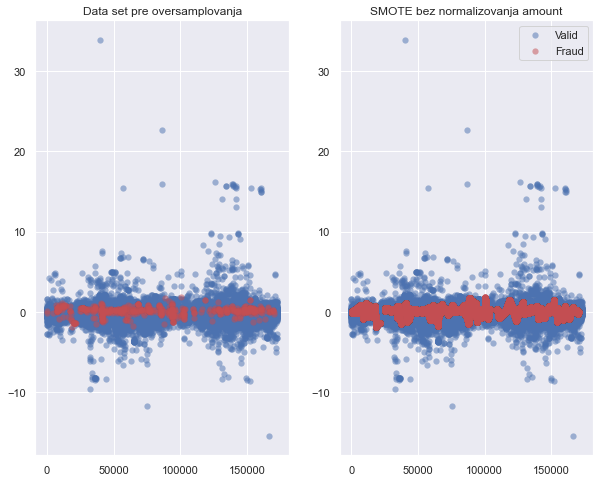

In [290]:
compare_plot(X, y, X_resampled, y_resampled, method1 = 'Data set pre oversamplovanja', method2='SMOTE bez normalizovanja amount')

In [291]:
# Deklarišemo i inicijalizujemo prep_data funkciju
new_X, new_y = prep_data(amount_norm_df)

In [292]:
# Kreiramo resamplovani set
new_X_resampled, new_y_resampled = method.fit_resample(new_X, new_y)

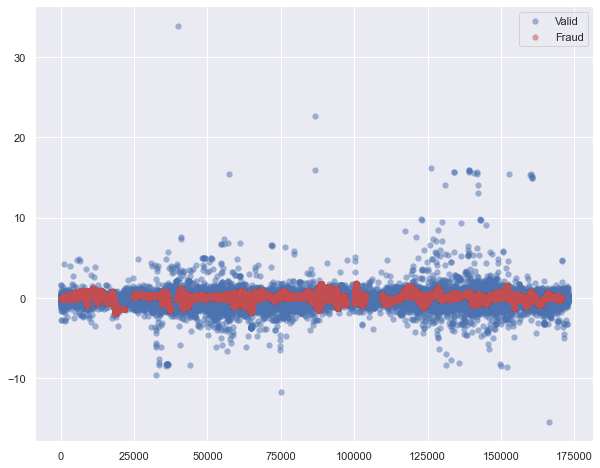

In [293]:
# Grafik za resamplovani data set
plot_data(new_X_resampled, new_y_resampled)

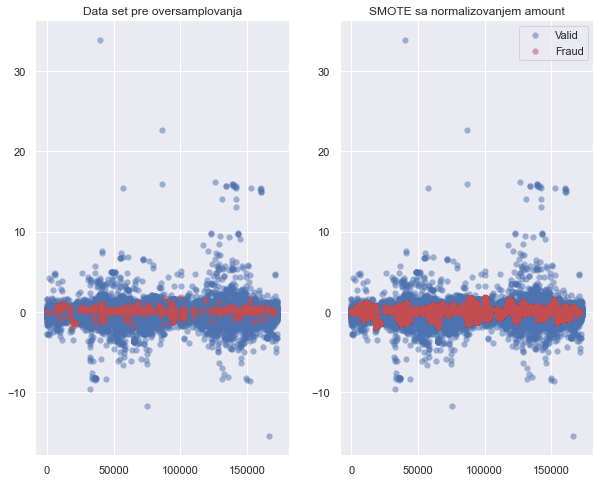

1    284315
0    284315
dtype: int64

In [294]:
compare_plot(X, y, new_X_resampled, new_y_resampled, method1 = 'Data set pre oversamplovanja', method2='SMOTE sa normalizovanjem amount')
pd.value_counts(pd.Series(new_y_resampled))

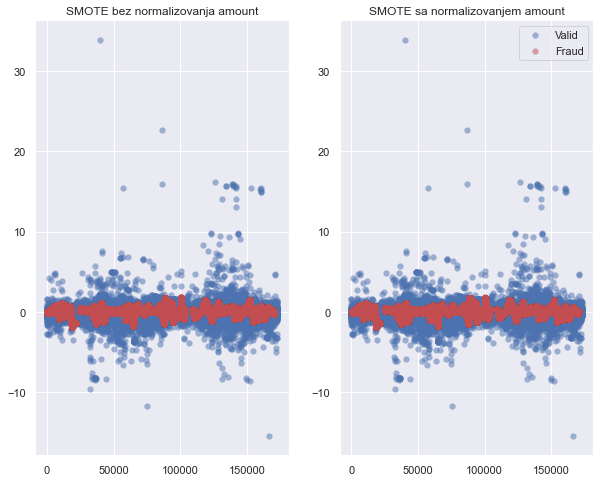

In [295]:
compare_plot(X_resampled, y_resampled, new_X_resampled, new_y_resampled, method1 = 'SMOTE bez normalizovanja amount', method2='SMOTE sa normalizovanjem amount')

# Obrada pocetnog data seta

In [296]:
df2 = pd.read_csv("C:/Users/kolac/Desktop/MFS/creditcard.csv")

In [297]:
def prep_data(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    """
   Konvertovanje DataFrame u 2 varijable
    X: data kolone (V1 - V30)
    y: labelovane kolona Class
    """
    X = df.iloc[:, 1:30].values
    y = df.Class.values
    return X, y

In [298]:
# Definisanje funkcije za kreiranje scatter plot-a na nasem setu
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

In [299]:
X, y = prep_data(df2)
print(f'X shape: {X.shape}\ny shape: {y.shape}')

X shape: (284807, 29)
y shape: (284807,)


In [300]:
X[0, :]

array([-1.35980713e+00, -7.27811733e-02,  2.53634674e+00,  1.37815522e+00,
       -3.38320770e-01,  4.62387778e-01,  2.39598554e-01,  9.86979013e-02,
        3.63786970e-01,  9.07941720e-02, -5.51599533e-01, -6.17800856e-01,
       -9.91389847e-01, -3.11169354e-01,  1.46817697e+00, -4.70400525e-01,
        2.07971242e-01,  2.57905802e-02,  4.03992960e-01,  2.51412098e-01,
       -1.83067779e-02,  2.77837576e-01, -1.10473910e-01,  6.69280749e-02,
        1.28539358e-01, -1.89114844e-01,  1.33558377e-01, -2.10530535e-02,
        1.49620000e+02])

In [301]:
df2.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [302]:
#Prebrojavanje ukupnog broja obzervacija po dužini y (kolona Class)

total_obs = len(y)
total_obs

284807

In [303]:
#Prebrojavanje ukupnog broja obzervacija koje nisu prevara

non_fraud = [i for i in y if i == 0]
count_non_fraud = non_fraud.count(0)
count_non_fraud

284315

In [304]:
percentage = count_non_fraud/total_obs * 100
print(f'{percentage:0.2f}%')
#gotova priprema

99.83%


In [305]:
#Podela data seta na trening i test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [306]:
#Za model uzimamo random forest model

model = RandomForestClassifier(random_state=5, n_estimators=20)

In [307]:
#Prilagodjavamo model našem trening setu

model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=5)

In [308]:
#Dobijanje informacija iz našeg data seta i predviđanja

predicted = model.predict(X_test)

In [309]:
#Model nema dilemu pri definisanju prevara,preciznost korišćenja ovog modela je maksimalna za ovaj slučaj
print(f'Accuracy Score:\n{accuracy_score(y_test, predicted):0.3f}')

Accuracy Score:
0.999


In [310]:
from sklearn.metrics import classification_report, confusion_matrix

# Odredjivanje predikcija
predicted = model.predict(X_test)

# Ispisivanje izvestaja klasifikacija koriscenjem predikcija
print(classification_report(y_test, predicted))

# Konfuzioni matrica koriscenjem predikcija
print(confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.71      0.82       147

    accuracy                           1.00     85443
   macro avg       0.98      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443

[[85291     5]
 [   42   105]]


# Sapirov test

In [311]:
#Sapirov test
from scipy.stats import shapiro
data = df
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print("Data set ima normalnu distribuciju")
else:
    print("Data set nema normalnu distribuciju")

stat=0.155, p=0.000
Data set nema normalnu distribuciju


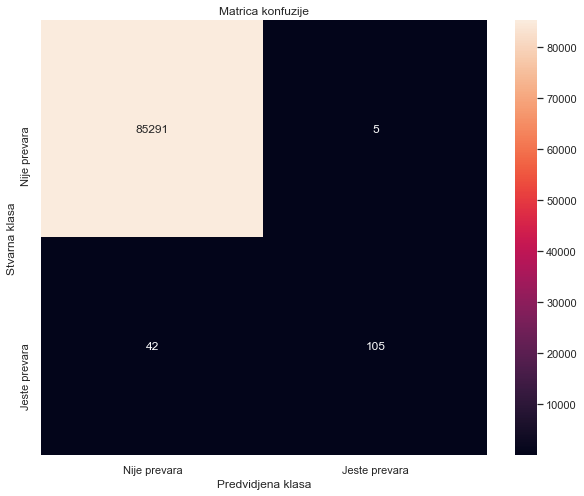

In [312]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predvidjena klasa');ax.set_ylabel('Stvarna klasa'); 
ax.set_title('Matrica konfuzije'); 
ax.xaxis.set_ticklabels(['Nije prevara', 'Jeste prevara']); ax.yaxis.set_ticklabels(['Nije prevara', 'Jeste prevara']);

Accuracy: 0.9994265182636377


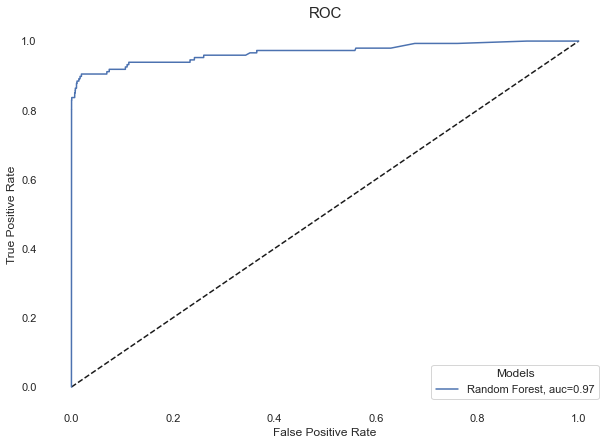

In [313]:
import sklearn.metrics as metrics
Ran = RandomForestClassifier(criterion= 'gini', max_depth= 6, 
                                     max_features= 5, n_estimators= 150, 
                                     random_state=0)
Ran.fit(X_train, y_train)
y_pred = Ran.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))
y_pred_proba_RF = Ran.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba_RF)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba_RF)



plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Random Forest, auc="+str(round(auc1,2)))

plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

# Obrada Normalizovanog seta

In [314]:
def prep_data(normalized_df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    """
   Konvertovanje DataFrame u 2 varijable
    X: data kolone (V1 - V28)
    y: labelovane kolona Class
    """
    X = normalized_df.iloc[:, 1:30].values
    y = normalized_df.Class.values
    return X, y

In [315]:
# Definisanje funkcije za kreiranje scatter plot-a na nasem setu
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

In [316]:
X, y = prep_data(normalized_df)
print(f'X shape: {X.shape}\ny shape: {y.shape}')

X shape: (284807, 29)
y shape: (284807,)


In [317]:
X[0, :]

array([0.93519234, 0.76649042, 0.8813649 , 0.31302266, 0.76343873,
       0.26766864, 0.26681518, 0.7864442 , 0.47531173, 0.51060048,
       0.25248432, 0.68090763, 0.3715906 , 0.63559053, 0.4460837 ,
       0.43439239, 0.73717255, 0.65506586, 0.59486323, 0.58294223,
       0.56118439, 0.52299212, 0.66379298, 0.39125268, 0.58512179,
       0.39455679, 0.41897614, 0.31269663, 0.00582379])

In [318]:
df2.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [319]:
#Prebrojavanje ukupnog broja obzervacija po dužini y (kolona Class)

total_obs = len(y)
total_obs

284807

In [320]:
#Prebrojavanje ukupnog broja obzervacija koje nisu prevara

non_fraud = [i for i in y if i == 0]
count_non_fraud = non_fraud.count(0)
count_non_fraud

284315

In [321]:
percentage = count_non_fraud/total_obs * 100
print(f'{percentage:0.2f}%')
#gotova priprema

99.83%


In [322]:
#Podela data seta na trening i test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [323]:
#Za model uzimamo random forest model

model = RandomForestClassifier(random_state=5, n_estimators=20)

In [324]:
#Prilagodjavamo model našem trening setu

model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=5)

In [325]:
#Dobijanje informacija iz našeg data seta i predviđanja

predicted = model.predict(X_test)

In [326]:
#Model nema dilemu pri definisanju prevara,preciznost korišćenja ovog modela je maksimalna za ovaj slučaj
print(f'Accuracy Score:\n{accuracy_score(y_test, predicted):0.3f}')

Accuracy Score:
0.999


In [327]:
from sklearn.metrics import classification_report, confusion_matrix

# Odredjivanje predikcija
predicted = model.predict(X_test)

# Ispisivanje izvestaja klasifikacija koriscenjem predikcija
print(classification_report(y_test, predicted))

# Konfuzioni matrica koriscenjem predikcija
print(confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.95      0.71      0.82       147

    accuracy                           1.00     85443
   macro avg       0.98      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443

[[85291     5]
 [   42   105]]


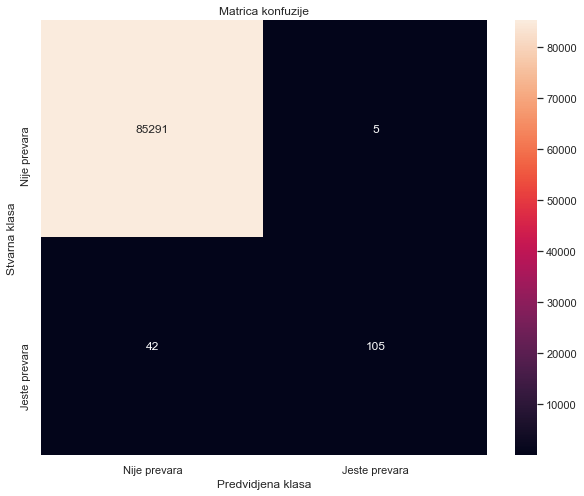

In [328]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# Labele, naslov 
ax.set_xlabel('Predvidjena klasa');ax.set_ylabel('Stvarna klasa'); 
ax.set_title('Matrica konfuzije'); 
ax.xaxis.set_ticklabels(['Nije prevara', 'Jeste prevara']); ax.yaxis.set_ticklabels(['Nije prevara', 'Jeste prevara']);

In [329]:
#Sapirov test
from scipy.stats import shapiro
data = normalized_df
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print("Data set ima normalnu distribuciju")
else:
    print("Data set nema normalnu distribuciju")

stat=0.984, p=0.000
Data set nema normalnu distribuciju


Accuracy: 0.9994382219725431


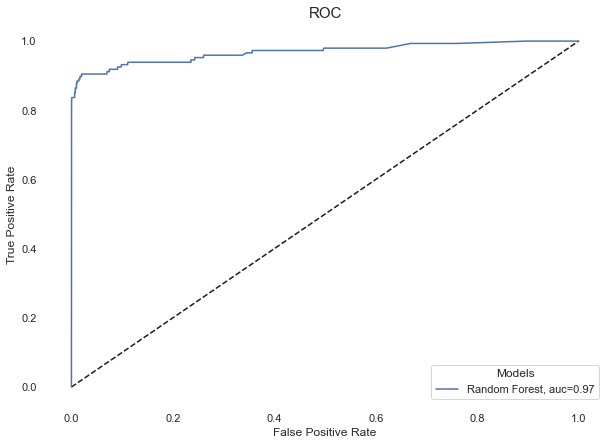

In [330]:
Ran = RandomForestClassifier(criterion= 'gini', max_depth= 6, 
                                     max_features= 5, n_estimators= 150, 
                                     random_state=0)
Ran.fit(X_train, y_train)
y_pred = Ran.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))
y_pred_proba_RF = Ran.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba_RF)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba_RF)



plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Random Forest, auc="+str(round(auc1,2)))

plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

# Obrada početnog balansiranog data seta

In [331]:
def form_pd_dataset(df: pd.DataFrame, X: np.ndarray, y: np.ndarray):
    new_data = np.append(X,y[:, None],axis=1)
    new_data_df = pd.DataFrame(new_data, columns=list(df.columns))
    return new_data_df

In [332]:
smote_df = form_pd_dataset(df,X_resampled, y_resampled)

In [333]:
smote_amount_df = form_pd_dataset(df,new_X_resampled, new_y_resampled)

In [334]:
smote_amount_df.to_csv("smote_amount_creditcard.csv", index=False)

In [335]:
def prep_data(smote_df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    """
   Konvertovanje DataFrame u 2 varijable
    X: data kolone (V1 - V28)
    y: labelovane kolona Class
    """
    X = smote_df.iloc[:, 1:30].values
    y = smote_df.Class.values
    return X, y

In [336]:
# Definisanje funkcije za kreiranje scatter plot-a na nasem setu
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

In [337]:
X, y = prep_data(smote_df)
print(f'X shape: {X.shape}\ny shape: {y.shape}')

X shape: (568630, 29)
y shape: (568630,)


In [338]:
X[0, :]

array([-1.35980713e+00, -7.27811733e-02,  2.53634674e+00,  1.37815522e+00,
       -3.38320770e-01,  4.62387778e-01,  2.39598554e-01,  9.86979013e-02,
        3.63786970e-01,  9.07941720e-02, -5.51599533e-01, -6.17800856e-01,
       -9.91389847e-01, -3.11169354e-01,  1.46817697e+00, -4.70400525e-01,
        2.07971242e-01,  2.57905802e-02,  4.03992960e-01,  2.51412098e-01,
       -1.83067779e-02,  2.77837576e-01, -1.10473910e-01,  6.69280749e-02,
        1.28539358e-01, -1.89114844e-01,  1.33558377e-01, -2.10530535e-02,
        1.49620000e+02])

In [339]:
smote_df.Class.value_counts()

1.0    284315
0.0    284315
Name: Class, dtype: int64

In [340]:
#Prebrojavanje ukupnog broja obzervacija po dužini y (kolona Class)

total_obs = len(y)
total_obs

568630

In [341]:
#Prebrojavanje ukupnog broja obzervacija koje nisu prevara

non_fraud = [i for i in y if i == 0]
count_non_fraud = non_fraud.count(0)
count_non_fraud

284315

In [342]:
percentage = count_non_fraud/total_obs * 100
print(f'{percentage:0.2f}%')
#gotova priprema

50.00%


In [343]:
#Podela data seta na trening i test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [344]:
#Za model uzimamo random forest model

model = RandomForestClassifier(random_state=5, n_estimators=20)

In [345]:
#Prilagodjavamo model našem trening setu

model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=5)

In [346]:
#Dobijanje informacija iz našeg data seta i predviđanja

predicted = model.predict(X_test)

In [347]:
#Model nema dilemu pri definisanju prevara,preciznost korišćenja ovog modela je maksimalna za ovaj slučaj
print(f'Accuracy Score:\n{accuracy_score(y_test, predicted):0.3f}')

Accuracy Score:
1.000


In [348]:
from sklearn.metrics import classification_report, confusion_matrix

# Odredjivanje predikcija
predicted = model.predict(X_test)

# Ispisivanje izvestaja klasifikacija koriscenjem predikcija
print(classification_report(y_test, predicted))

# Konfuzioni matrica koriscenjem predikcija
print(confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85172
         1.0       1.00      1.00      1.00     85417

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

[[85151    21]
 [    4 85413]]


In [349]:
#Sapirov test
from scipy.stats import shapiro
data = smote_df
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print("Data set ima normalnu distribuciju")
else:
    print("Data set nema normalnu distribuciju")

stat=0.156, p=0.000
Data set nema normalnu distribuciju


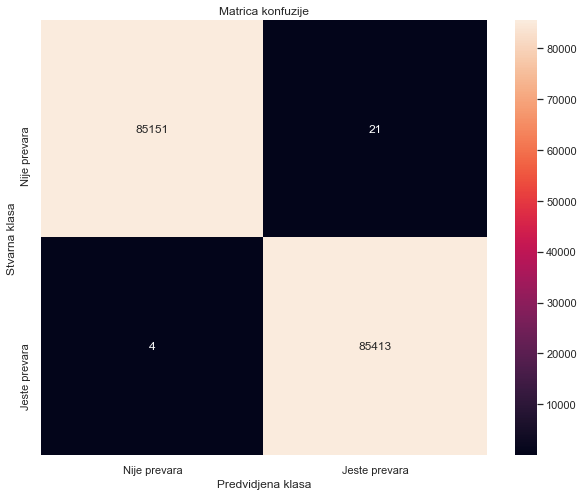

In [350]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# Labele, naslovi
ax.set_xlabel('Predvidjena klasa');ax.set_ylabel('Stvarna klasa'); 
ax.set_title('Matrica konfuzije'); 
ax.xaxis.set_ticklabels(['Nije prevara', 'Jeste prevara']); ax.yaxis.set_ticklabels(['Nije prevara', 'Jeste prevara']);

Accuracy: 0.9740252888521534


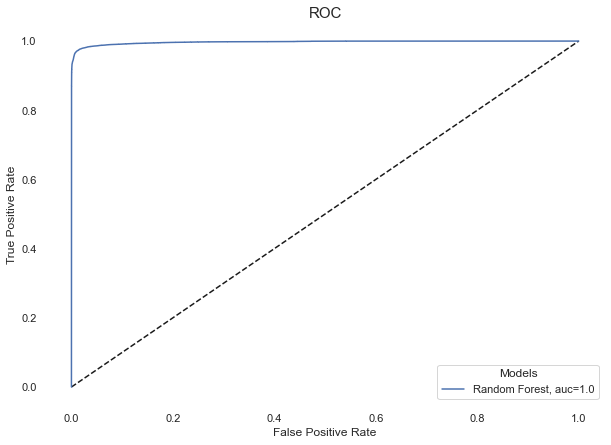

In [351]:
Ran = RandomForestClassifier(criterion= 'gini', max_depth= 6, 
                                     max_features= 5, n_estimators= 150, 
                                     random_state=0)
Ran.fit(X_train, y_train)
y_pred = Ran.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))
y_pred_proba_RF = Ran.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba_RF)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba_RF)



plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Random Forest, auc="+str(round(auc1,2)))

plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);


In [352]:
model.fit(X_train, y_train).score(X_train, y_train)

0.9999974876959912

In [353]:
model.fit(X_test, y_test).score(X_test, y_test)

1.0

# Obrada normalizovanog balansiranog data seta

In [354]:
def prep_data(normalized_df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    """
   Konvertovanje DataFrame u 2 varijable
    X: data kolone (V1 - V28)
    y: labelovane kolona Class
    """
    X = normalized_df.iloc[:, 1:30].values
    y = normalized_df.Class.values
    return X, y

In [355]:
# Funkcija za pripremu
X, y = prep_data(normalized_df)

In [356]:
print(f'X shape: {X.shape}\ny shape: {y.shape}')


X shape: (284807, 29)
y shape: (284807,)


In [357]:
# Definisanje resampling metode
method = SMOTE()

In [358]:
# Kreiranje resamplovanog seta za rad
X_resampled, y_resampled = method.fit_sample(X, y)

In [360]:
#Prebrojavanje ukupnog broja obzervacija po dužini y (kolona Class)

total_obs = len(y)
total_obs

284807

In [361]:
#Prebrojavanje ukupnog broja obzervacija koje nisu prevara

non_fraud = [i for i in y if i == 0]
count_non_fraud = non_fraud.count(0)
count_non_fraud

284315

In [362]:
percentage = count_non_fraud/total_obs * 100
print(f'{percentage:0.2f}%')
#gotova priprema

99.83%


In [363]:
#Podela data seta na trening i test set

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0)

In [364]:
#Za model uzimamo random forest model

model = RandomForestClassifier(random_state=5, n_estimators=20)

In [365]:
#Prilagodjavamo model našem trening setu

model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=5)

In [366]:
#Dobijanje informacija iz našeg data seta i predviđanja

predicted = model.predict(X_test)

In [367]:
#Model nema dilemu pri definisanju prevara,preciznost korišćenja ovog modela je maksimalna za ovaj slučaj
print(f'Accuracy Score:\n{accuracy_score(y_test, predicted):0.3f}')

Accuracy Score:
1.000


In [368]:
from sklearn.metrics import classification_report, confusion_matrix

# Odredjivanje predikcija
predicted = model.predict(X_test)

# Ispisivanje izvestaja klasifikacija koriscenjem predikcija
print(classification_report(y_test, predicted))

# Konfuzioni matrica koriscenjem predikcija
print(confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85172
           1       1.00      1.00      1.00     85417

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

[[85151    21]
 [    0 85417]]


In [369]:
#Sapirov test
from scipy.stats import shapiro
data = smote_df
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print("Data set ima normalnu distribuciju")
else:
    print("Data set nema normalnu distribuciju")

stat=0.156, p=0.000
Data set nema normalnu distribuciju


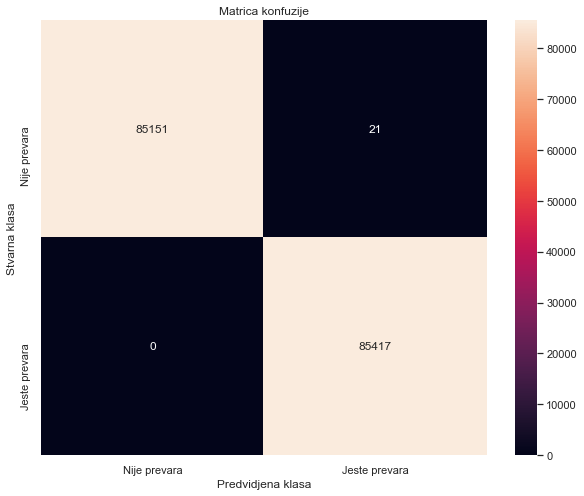

In [370]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# Labele, naslovi
ax.set_xlabel('Predvidjena klasa');ax.set_ylabel('Stvarna klasa'); 
ax.set_title('Matrica konfuzije'); 
ax.xaxis.set_ticklabels(['Nije prevara', 'Jeste prevara']); ax.yaxis.set_ticklabels(['Nije prevara', 'Jeste prevara']);

Accuracy: 0.9603081089636495


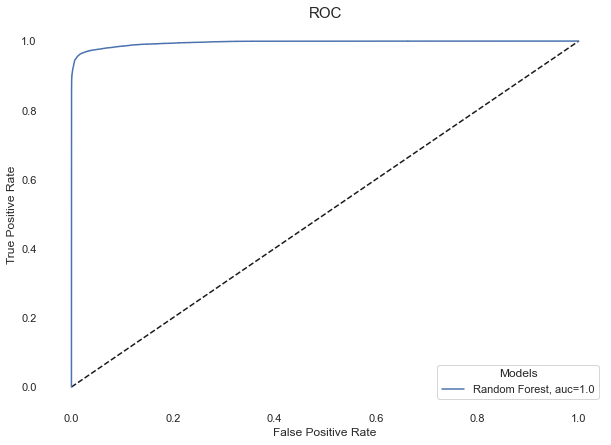

In [371]:
Ran = RandomForestClassifier(criterion= 'gini', max_depth= 6, 
                                     max_features= 5, n_estimators= 150, 
                                     random_state=0)
Ran.fit(X_train, y_train)
y_pred = Ran.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))
y_pred_proba_RF = Ran.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba_RF)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba_RF)



plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Random Forest, auc="+str(round(auc1,2)))

plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);


In [372]:
model.fit(X_train, y_train).score(X_train, y_train)

0.9999974876959912

In [373]:
model.fit(X_test, y_test).score(X_test, y_test)

1.0